<a href="https://colab.research.google.com/github/GustavBoye/DRED_Autoencoder/blob/main/DAYS_prediction_with_vol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  5 of 5 completed


[*********************100%***********************]  5 of 5 completed


[*********************100%***********************]  5 of 5 completed


[*********************100%***********************]  5 of 5 completed


[*********************100%***********************]  5 of 5 completed


[*********************100%***********************]  5 of 5 completed


[*********************100%***********************]  5 of 5 completed


[*********************100%***********************]  5 of 5 completed


[*********************100%***********************]  5 of 5 completed


[*********************100%***********************]  5 of 5 completed


[*********************100%***********************]  5 of 5 completed


[*********************100%***********************]  5 of 5 completed


[*********************100%***********************]  5 of 5 completed


[*********************100%***********************]  5 of 5 completed


[*********************100%***********************]  4 of 4 completed


[*********************100%***********************]  5 of 5 completed


[*********************100%***********************]  5 of 5 completed


[*********************100%***********************]  5 of 5 completed


[*********************100%***********************]  5 of 5 completed


[*********************100%***********************]  5 of 5 completed


[*********************100%***********************]  5 of 5 completed


[*********************100%***********************]  5 of 5 completed


[*********************100%***********************]  5 of 5 completed


[*********************100%***********************]  5 of 5 completed


[*********************100%***********************]  5 of 5 completed


[*********************100%***********************]  5 of 5 completed


[*********************100%***********************]  5 of 5 completed


[*********************100%***********************]  5 of 5 completed


[*********************100%***********************]  5 of 5 completed


[*********************100%***********************]  4 of 4 completed


Training model 1/2 for 64-day prediction...
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 0.0568 - val_loss: 0.0212 - learning_rate: 0.0010
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - loss: 0.0163 - val_loss: 0.0083 - learning_rate: 0.0010
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0062 - val_loss: 0.0043 - learning_rate: 0.0010
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0032 - val_loss: 0.0032 - learning_rate: 0.0010
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - loss: 0.0026 - val_loss: 0.0036 - learning_rate: 0.0010
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0027 - val_loss: 0.0029 - learning_rate: 0.0010
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0023 - val_loss: 0.0029 - learning_rate: 0.0010
Epoch 8/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - loss: 0.0022 - val_loss: 0.0030 - learning_rate: 0.0010
Epoch 9/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - l

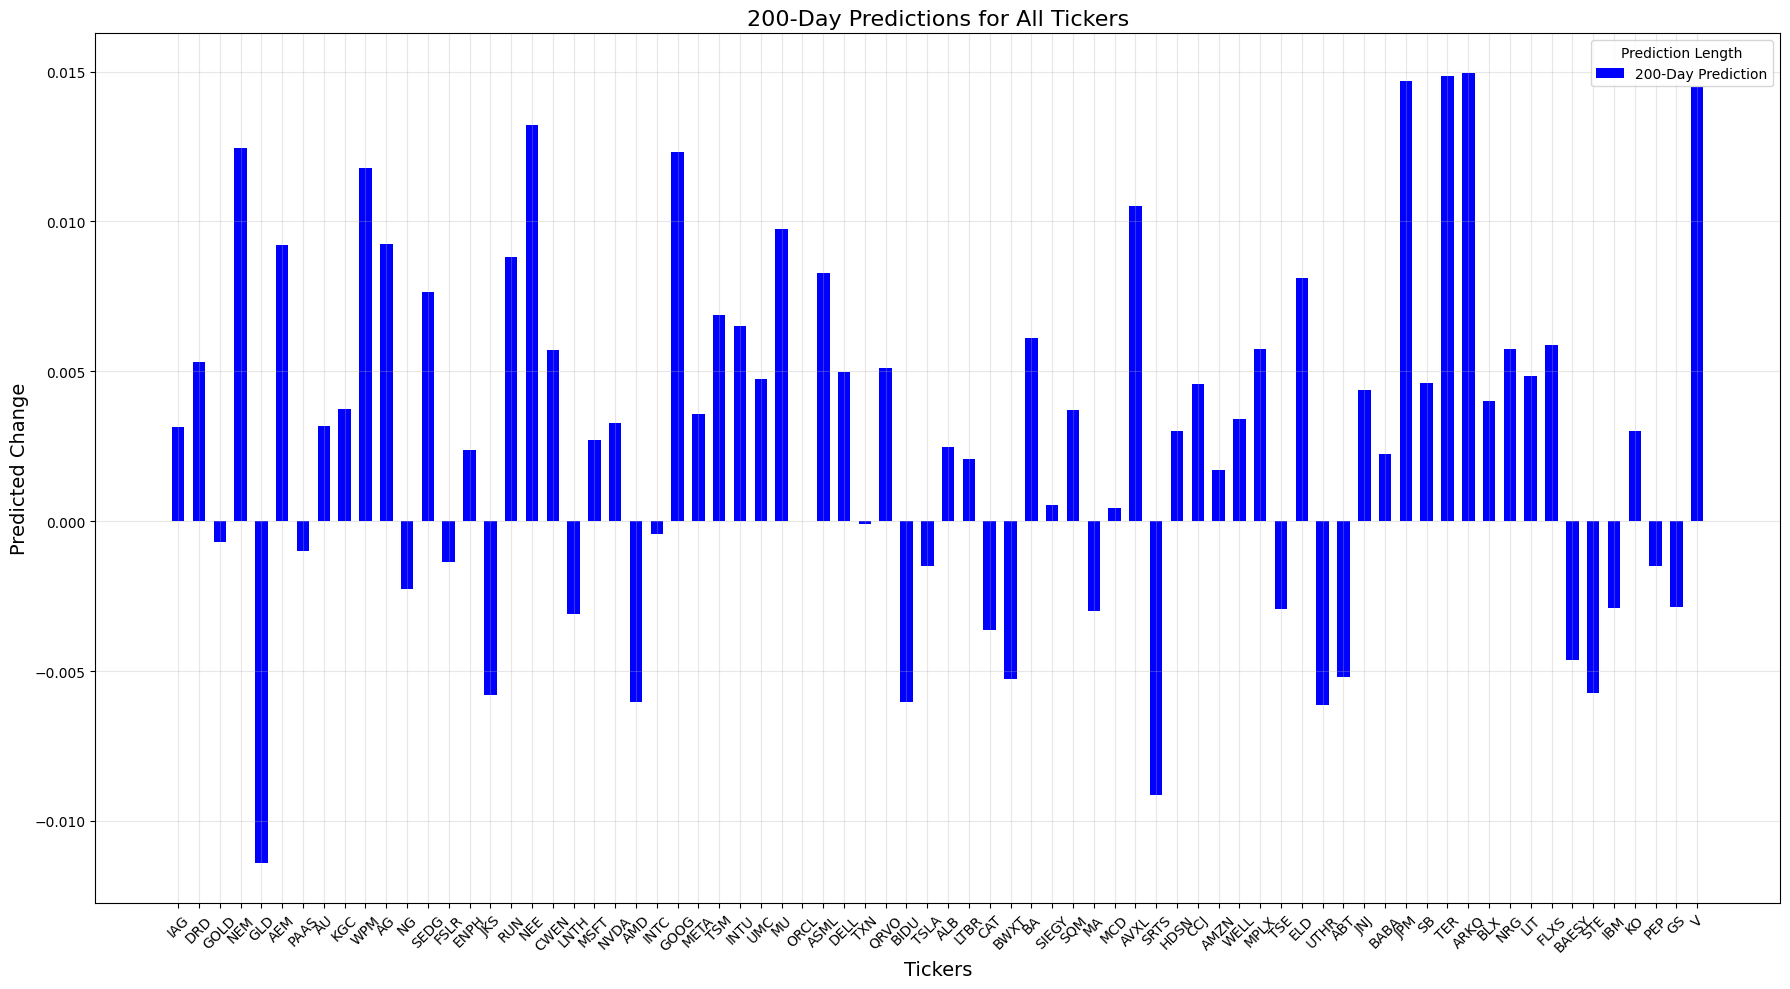

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import tensorflow as tf
import yfinance as yf
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

DAYS = 64
HISTORY = 128


# Helper function for normalization
def normalize_min_max(data):
    return (data - np.min(data, axis=0)) / (np.max(data, axis=0) - np.min(data, axis=0))

# Define input tickers
input_tickers = [
    'IAG', 'DRD', 'GOLD', 'NEM', 'GLD', 'AEM', 'PAAS', 'AU', 'KGC', 'WPM', 'AG', 'NG',
    'SEDG', 'FSLR', 'ENPH', 'JKS', 'RUN', 'NEE', 'CWEN', 'LNTH',
    'MSFT', 'NVDA', 'AMD', 'INTC', 'GOOG', 'META', 'TSM', 'INTU', 'UMC', 'MU', 'ORCL', 'ASML', 'DELL', 'TXN', 'QRVO', 'BIDU',
    'TSLA', 'ALB', 'LTBR', 'CAT', 'BWXT', 'BA', 'SIEGY', 'SQM', 'MA', 'MCD', 'AVXL', 'SRTS',
    'HDSN', 'CCJ', 'AMZN', 'WELL', 'MPLX', 'TSE', 'ELD', 'UTHR', 'ABT', 'JNJ', 'BABA', 'JPM', 'SB', 'TER', 'ARKQ', 'BLX', 'NRG', 'LIT', 'FLXS', 'BAESY', 'STE', 'IBM', 'KO', 'PEP', 'GS', 'V'
]

import time
import pandas as pd # Import pandas here
import yfinance as yf

def batch_download(tickers, start, end, interval, batch_size=5):
    all_data = {}
    for i in range(0, len(tickers), batch_size):
        batch_tickers = tickers[i:i + batch_size]
        print(f"Downloading data for: {batch_tickers}")

        # Try to download the data for this batch
        try:
            data = yf.download(batch_tickers, start=start, end=end, interval=interval)['Close']
            all_data.update(data.to_dict())
        except Exception as e:
            print(f"Error downloading data for {batch_tickers}: {e}")
            time.sleep(4)  # Wait for a bit before retrying if an error occurs

        time.sleep(5)  # Sleep between batches to avoid hitting rate limits
    return pd.DataFrame(all_data)

# Fetch stock data in batches
data = batch_download(input_tickers, start="2017-01-01", end="2025-02-11", interval="1d")
data_volume = batch_download(input_tickers, start="2017-01-01", end="2025-02-11", interval="1d")


# Preprocess the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

scaler_vol = MinMaxScaler()
data_scaled_vol = scaler_vol.fit_transform(data_volume)


# Function to create supervised learning dataset
def create_dataset(data, vol, time_steps=0, future_steps=0):
    X, y = [], []
    for i in range(len(data) - time_steps - future_steps):

        data_to_insert_a = normalize_min_max(data[i:i + time_steps])
        data_to_insert_b = normalize_min_max(vol[i:i + time_steps])
        data_to_insert = np.concatenate([data_to_insert_a, data_to_insert_b], axis=0)
        X.append(data_to_insert)

        future_prices = data[i + time_steps:i + time_steps + future_steps]
        current_price = data[i + time_steps - 1]
        future_average_price = np.mean(future_prices, axis=0)
        target = future_average_price - current_price
        y.append(target)
    return np.array(X), np.array(y)

# Function to create inverted dataset
def create_inverted_dataset(data, vol, time_steps=0, future_steps=0):
    inverted_data = 1-data
    X, y = [], []
    for i in range(len(inverted_data) - time_steps - future_steps):

        data_to_insert_a = normalize_min_max(inverted_data[i:i + time_steps])
        data_to_insert_b = normalize_min_max(vol[i:i + time_steps])
        data_to_insert = np.concatenate([data_to_insert_a, data_to_insert_b], axis=0)
        X.append(data_to_insert)

        future_prices = inverted_data[i + time_steps:i + time_steps + future_steps]
        current_price = inverted_data[i + time_steps - 1]
        future_average_price = np.mean(future_prices, axis=0)
        target = future_average_price - current_price
        y.append(target)
    return np.array(X), np.array(y)

# Prepare dataset (200-day version)
X_s, y_s = create_dataset(data_scaled, data_scaled_vol, time_steps=HISTORY, future_steps=DAYS)
X_inv_s, y_inv_s = create_inverted_dataset(data_scaled, data_scaled_vol, time_steps=HISTORY, future_steps=DAYS)
X_combined_s = np.concatenate((X_s, X_inv_s), axis=0)
y_combined_s = np.concatenate((y_s, y_inv_s), axis=0)

def build_model(shape1, shape2):
    input_layer = tf.keras.layers.Input(shape=(shape1, shape2))
    x = tf.keras.layers.SpatialDropout1D(0.3)(input_layer)
    x = tf.keras.layers.Conv1D(64, 5, strides=2, padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.0006))(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('gelu')(x)
    x = tf.keras.layers.Dropout(0.2)(x)

    x1 = tf.keras.layers.Conv1D(64, 1, strides=1, padding="same")(x)
    x1 = tf.keras.layers.Activation('gelu')(x1)
    x = x + x1  # Residual connection

    x = tf.keras.layers.Conv1D(128, 5, strides=2, padding="same")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('gelu')(x)

    x1 = tf.keras.layers.Conv1D(128, 1, strides=1, padding="same")(x)
    x1 = tf.keras.layers.Activation('gelu')(x1)
    x = x + x1  # Residual connection

    x1 = tf.keras.layers.Conv1D(128, 1, strides=1, padding="same")(x)
    x1 = tf.keras.layers.Activation('gelu')(x1)
    x = x + x1  # Residual connection

    x = tf.keras.layers.Conv1D(128, 5, strides=2, padding="same")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('gelu')(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dropout(0.1)(x)

    dense1 = tf.keras.layers.Dense(128, activation='gelu')(x)
    dense1 = tf.keras.layers.Dropout(0.1)(dense1)
    dense2 = tf.keras.layers.Dense(128, activation='gelu')(dense1)
    dense = dense1+dense2


    output = tf.keras.layers.Dense(len(input_tickers))(dense)

    model = tf.keras.Model(inputs=input_layer, outputs=output)
    return model

def build_model_2(shape1, shape2):
    input_layer = tf.keras.layers.Input(shape=(shape1, shape2))
    x = tf.keras.layers.SpatialDropout1D(0.2)(input_layer)
    x = tf.keras.layers.Conv1D(16, 5, strides=2, padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('gelu')(x)
    x = tf.keras.layers.Dropout(0.1)(x)

    x1 = tf.keras.layers.Conv1D(16, 1, strides=1, padding="same")(x)
    x1 = tf.keras.layers.Activation('gelu')(x1)
    x = x + x1  # Residual connection

    x = tf.keras.layers.Conv1D(16, 5, strides=2, padding="same")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('gelu')(x)

    x = tf.keras.layers.Conv1D(16, 5, strides=2, padding="same")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('gelu')(x)
    x = tf.keras.layers.Flatten()(x)

    dense1 = tf.keras.layers.Dense(16, activation='gelu')(x)
    dense1 = tf.keras.layers.Dropout(0.1)(dense1)
    dense2 = tf.keras.layers.Dense(16, activation='gelu')(dense1)
    dense = dense1+dense2


    output = tf.keras.layers.Dense(len(input_tickers))(dense)

    model = tf.keras.Model(inputs=input_layer, outputs=output)
    return model

def build_model3(shape1, shape2):
    input_layer = tf.keras.layers.Input(shape=(shape1, shape2))
    x = tf.keras.layers.SpatialDropout1D(0.3)(input_layer)
    x = tf.keras.layers.Conv1D(32, 5, strides=2, padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.0006))(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('gelu')(x)
    x = tf.keras.layers.Dropout(0.2)(x)

    x1 = tf.keras.layers.Conv1D(32, 1, strides=1, padding="same")(x)
    x1 = tf.keras.layers.Activation('gelu')(x1)
    x = x + x1  # Residual connection
    x = tf.keras.layers.SpatialDropout1D(0.3)(x)

    x = tf.keras.layers.Conv1D(32, 5, strides=2, padding="same")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('gelu')(x)

    x = tf.keras.layers.MultiHeadAttention(num_heads=4, key_dim=32)(x, x)  # ✅ Add Transformer attention
    x = tf.keras.layers.LayerNormalization()(x)
    x = tf.keras.layers.Activation('gelu')(x)
    x = tf.keras.layers.SpatialDropout1D(0.1)(x)

    x = tf.keras.layers.Conv1D(64, 5, strides=2, padding="same")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('gelu')(x)
    x = tf.keras.layers.Flatten()(x)

    dense1 = tf.keras.layers.Dense(128, activation='gelu')(x)
    dense1 = tf.keras.layers.Dropout(0.1)(dense1)
    dense2 = tf.keras.layers.Dense(128, activation='gelu')(dense1)
    dense = dense1+dense2


    output = tf.keras.layers.Dense(len(input_tickers))(dense)

    model = tf.keras.Model(inputs=input_layer, outputs=output)
    return model


# Training setup
num_models = 2
early_stopping = EarlyStopping(monitor='val_loss', patience=8, min_delta=1e-4, restore_best_weights=True, mode='min', verbose=1)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=12, verbose=1)

import random
# Train the ensemble (200-day version)
ensemble = []
for i in range(num_models):
    print(f"Training model {i+1}/{num_models} for {DAYS}-day prediction...")
    model = build_model(X_combined_s.shape[1], X_combined_s.shape[2])
    optimizer = tf.keras.optimizers.AdamW(learning_rate=0.001, weight_decay=1e-5)
    model.compile(optimizer=optimizer, loss='huber')
    model.fit(X_combined_s, y_combined_s, epochs=100, batch_size=random.choice([16, 32]), validation_split=0.2, verbose=1, callbacks=[early_stopping, lr_scheduler])
    ensemble.append(model)

# Predictions (200-day version)
predictions = {ticker: [] for ticker in input_tickers}
for idx, ticker in enumerate(input_tickers):
    predictions[ticker] = np.mean([m(X_combined_s[:1]).numpy()[:, idx] for m in ensemble], axis=0)

# Plot predictions
fig, ax = plt.subplots(figsize=(18, 10))
tickers_range = np.arange(len(input_tickers))
pred_days = np.array([predictions[ticker] for ticker in input_tickers]).flatten()
ax.bar(tickers_range, pred_days, color='blue', width=0.6, label='200-Day Prediction')

ax.set_title("200-Day Predictions for All Tickers", fontsize=16)
ax.set_xlabel("Tickers", fontsize=14)
ax.set_ylabel("Predicted Change", fontsize=14)
ax.set_xticks(tickers_range)
ax.set_xticklabels(input_tickers, rotation=45, fontsize=10)
ax.legend(title="Prediction Length", fontsize=10)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

import pandas as pd

# Convert predictions dictionary to DataFrame
predictions_df = pd.DataFrame.from_dict(predictions, orient='index', columns=['{DAYS}-Day Prediction'])

# Save as CSV
predictions_df.to_csv(f"predictions_{DAYS}.csv")

# Download in Colab
from google.colab import files
files.download(f"predictions_{DAYS}.csv")